In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [126]:
vanndf = pd.read_csv('temp.txt', delimiter='\t')
luftdf = pd.read_csv('lufttemp.txt', delimiter='\t')

In [127]:
vanndf

,Tid,Nr,Temperatur: 0.5m,Temperatur: 1.5m,Temperatur: 2.5m,Temperatur: 3.5m,Temperatur: 4.5m,Temperatur: 5.5m,Temperatur: 6.5m,Temperatur: 7.5m,Temperatur: 8.5m,Temperatur: 9.5m,Temperatur: 10.5m,Temperatur: 11.5m,Temperatur: 12.5m,Temperatur: 13.5m,Temperatur: 14.5m,Temperatur: 15.5m,Temperatur: 16.5m,Temperatur: 17.5m,Unnamed: 20
0,2016.08.21.00,1,15.398,15.232,14.970,14.675,14.567,14.460,14.073,13.805,13.348,12.782,12.009,10.709,9.650,9.195,8.740,8.234,8.084,7.935,NaN
1,2016.08.21.02,2,15.410,15.276,15.179,14.853,14.696,14.539,14.092,13.823,13.555,12.768,12.276,10.817,9.752,9.492,8.916,8.401,-,-,NaN
2,2016.08.21.04,3,15.318,15.169,15.011,14.851,14.658,14.464,13.914,13.668,12.955,12.242,11.565,10.567,9.259,8.975,8.690,8.175,8.035,7.895,NaN
3,2016.08.21.08,4,15.493,15.187,14.836,14.570,14.348,14.127,13.377,13.046,12.336,11.235,10.718,9.719,8.904,8.527,8.180,7.897,7.836,7.774,NaN
4,2016.08.21.10,5,14.948,14.829,14.711,14.591,14.460,14.194,13.660,13.359,12.412,11.778,10.919,9.981,9.002,8.718,8.435,7.891,7.815,-,NaN
5,2016.08.21.12,6,15.713,15.398,14.967,14.681,14.629,14.397,14.074,13.656,13.239,12.443,12.082,10.683,9.523,9.043,8.604,8.117,7.986,7.856,NaN
6,2016.08.21.18,7,16.950,16.399,15.525,14.854,14.614,14.362,13.671,13.424,12.626,11.789,10.840,9.934,8.709,8.536,8.364,8.033,7.922,-,NaN
7,2016.08.21.20,8,16.989,16.407,15.465,14.751,14.434,14.117,13.613,13.410,12.581,11.452,10.573,9.728,8.806,8.542,8.279,7.991,7.914,7.837,NaN
8,2016.08.21.22,9,16.093,15.685,15.182,14.835,14.579,14.324,13.735,13.514,12.641,11.577,10.882,9.880,8.979,8.626,8.271,7.886,7.782,7.743,NaN


In [128]:
count = vanndf.iloc[:, -1].apply(lambda x: 0 if np.isnan(x) else 1).sum()

print(count)

0


Ingen verdier i siste kolonne

In [129]:
vanndf = vanndf.drop(vanndf.columns[-1], axis=1)
vanndf

,Tid,Nr,Temperatur: 0.5m,Temperatur: 1.5m,Temperatur: 2.5m,Temperatur: 3.5m,Temperatur: 4.5m,Temperatur: 5.5m,Temperatur: 6.5m,Temperatur: 7.5m,Temperatur: 8.5m,Temperatur: 9.5m,Temperatur: 10.5m,Temperatur: 11.5m,Temperatur: 12.5m,Temperatur: 13.5m,Temperatur: 14.5m,Temperatur: 15.5m,Temperatur: 16.5m,Temperatur: 17.5m
0,2016.08.21.00,1,15.398,15.232,14.970,14.675,14.567,14.460,14.073,13.805,13.348,12.782,12.009,10.709,9.650,9.195,8.740,8.234,8.084,7.935
1,2016.08.21.02,2,15.410,15.276,15.179,14.853,14.696,14.539,14.092,13.823,13.555,12.768,12.276,10.817,9.752,9.492,8.916,8.401,-,-
2,2016.08.21.04,3,15.318,15.169,15.011,14.851,14.658,14.464,13.914,13.668,12.955,12.242,11.565,10.567,9.259,8.975,8.690,8.175,8.035,7.895
3,2016.08.21.08,4,15.493,15.187,14.836,14.570,14.348,14.127,13.377,13.046,12.336,11.235,10.718,9.719,8.904,8.527,8.180,7.897,7.836,7.774
4,2016.08.21.10,5,14.948,14.829,14.711,14.591,14.460,14.194,13.660,13.359,12.412,11.778,10.919,9.981,9.002,8.718,8.435,7.891,7.815,-
5,2016.08.21.12,6,15.713,15.398,14.967,14.681,14.629,14.397,14.074,13.656,13.239,12.443,12.082,10.683,9.523,9.043,8.604,8.117,7.986,7.856
6,2016.08.21.18,7,16.950,16.399,15.525,14.854,14.614,14.362,13.671,13.424,12.626,11.789,10.840,9.934,8.709,8.536,8.364,8.033,7.922,-
7,2016.08.21.20,8,16.989,16.407,15.465,14.751,14.434,14.117,13.613,13.410,12.581,11.452,10.573,9.728,8.806,8.542,8.279,7.991,7.914,7.837
8,2016.08.21.22,9,16.093,15.685,15.182,14.835,14.579,14.324,13.735,13.514,12.641,11.577,10.882,9.880,8.979,8.626,8.271,7.886,7.782,7.743


In [130]:
luftdf

,Tid,Nr,Lufttemperatur
2016.08.21.00,1,12.0,NaN
2016.08.21.02,2,11.9,NaN
2016.08.21.04,3,10.4,NaN
2016.08.21.08,4,11.3,NaN
2016.08.21.10,5,14.4,NaN
2016.08.21.12,6,17.2,NaN
2016.08.21.18,7,20.4,NaN
2016.08.21.20,8,18.1,NaN
2016.08.21.22,9,16.2,NaN


In [131]:
import pandas as pd

# Sample DataFrame
data = {
    'Tid': ['2016.08.21.00', '2016.08.21.02', '2016.08.21.04', '2016.08.21.08', '2016.08.21.10', '2016.08.21.12', '2016.08.21.18', '2016.08.21.20', '2016.08.21.22'],
    'Nr': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Lufttemperatur': [12.0, 11.9, 10.4, 11.3, 14.4, 17.2, 20.4, 18.1, 16.2],
    'NaN': [None] * 9
}

luftdf = pd.DataFrame(data)

# Set display options to adjust column width
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Display the DataFrame
luftdf


,Tid,Nr,Lufttemperatur,NaN
0,2016.08.21.00,1,12.0,None
1,2016.08.21.02,2,11.9,None
2,2016.08.21.04,3,10.4,None
3,2016.08.21.08,4,11.3,None
4,2016.08.21.10,5,14.4,None
5,2016.08.21.12,6,17.2,None
6,2016.08.21.18,7,20.4,None
7,2016.08.21.20,8,18.1,None
8,2016.08.21.22,9,16.2,None


In [132]:
luftdf = luftdf.drop(columns=['NaN'])
luftdf

,Tid,Nr,Lufttemperatur
0,2016.08.21.00,1,12.0
1,2016.08.21.02,2,11.9
2,2016.08.21.04,3,10.4
3,2016.08.21.08,4,11.3
4,2016.08.21.10,5,14.4
5,2016.08.21.12,6,17.2
6,2016.08.21.18,7,20.4
7,2016.08.21.20,8,18.1
8,2016.08.21.22,9,16.2


In [133]:
vanndf

,Tid,Nr,Temperatur: 0.5m,Temperatur: 1.5m,Temperatur: 2.5m,Temperatur: 3.5m,Temperatur: 4.5m,Temperatur: 5.5m,Temperatur: 6.5m,Temperatur: 7.5m,Temperatur: 8.5m,Temperatur: 9.5m,Temperatur: 10.5m,Temperatur: 11.5m,Temperatur: 12.5m,Temperatur: 13.5m,Temperatur: 14.5m,Temperatur: 15.5m,Temperatur: 16.5m,Temperatur: 17.5m
0,2016.08.21.00,1,15.398,15.232,14.970,14.675,14.567,14.460,14.073,13.805,13.348,12.782,12.009,10.709,9.650,9.195,8.740,8.234,8.084,7.935
1,2016.08.21.02,2,15.410,15.276,15.179,14.853,14.696,14.539,14.092,13.823,13.555,12.768,12.276,10.817,9.752,9.492,8.916,8.401,-,-
2,2016.08.21.04,3,15.318,15.169,15.011,14.851,14.658,14.464,13.914,13.668,12.955,12.242,11.565,10.567,9.259,8.975,8.690,8.175,8.035,7.895
3,2016.08.21.08,4,15.493,15.187,14.836,14.570,14.348,14.127,13.377,13.046,12.336,11.235,10.718,9.719,8.904,8.527,8.180,7.897,7.836,7.774
4,2016.08.21.10,5,14.948,14.829,14.711,14.591,14.460,14.194,13.660,13.359,12.412,11.778,10.919,9.981,9.002,8.718,8.435,7.891,7.815,-
5,2016.08.21.12,6,15.713,15.398,14.967,14.681,14.629,14.397,14.074,13.656,13.239,12.443,12.082,10.683,9.523,9.043,8.604,8.117,7.986,7.856
6,2016.08.21.18,7,16.950,16.399,15.525,14.854,14.614,14.362,13.671,13.424,12.626,11.789,10.840,9.934,8.709,8.536,8.364,8.033,7.922,-
7,2016.08.21.20,8,16.989,16.407,15.465,14.751,14.434,14.117,13.613,13.410,12.581,11.452,10.573,9.728,8.806,8.542,8.279,7.991,7.914,7.837
8,2016.08.21.22,9,16.093,15.685,15.182,14.835,14.579,14.324,13.735,13.514,12.641,11.577,10.882,9.880,8.979,8.626,8.271,7.886,7.782,7.743


In [134]:
luftdf

,Tid,Nr,Lufttemperatur
0,2016.08.21.00,1,12.0
1,2016.08.21.02,2,11.9
2,2016.08.21.04,3,10.4
3,2016.08.21.08,4,11.3
4,2016.08.21.10,5,14.4
5,2016.08.21.12,6,17.2
6,2016.08.21.18,7,20.4
7,2016.08.21.20,8,18.1
8,2016.08.21.22,9,16.2


Klar til å modellere - oppgave a

Plot the air-temperature and the water surface temperature (0.5m) in the same plot (as a
function of time).


In [135]:
y1, y2 = luftdf['Lufttemperatur'], vanndf['Temperatur: 0.5m']

In [136]:
x = luftdf['Tid'].str[-2:]  # Extract the last two characters from the 'Tid' column
x

0    00
1    02
2    04
3    08
4    10
5    12
6    18
7    20
8    22
Name: Tid, dtype: object

In [137]:
y1

0    12.0
1    11.9
2    10.4
3    11.3
4    14.4
5    17.2
6    20.4
7    18.1
8    16.2
Name: Lufttemperatur, dtype: float64

In [138]:
y2

0    15.398
1    15.410
2    15.318
3    15.493
4    14.948
5    15.713
6    16.950
7    16.989
8    16.093
Name: Temperatur: 0.5m, dtype: float64

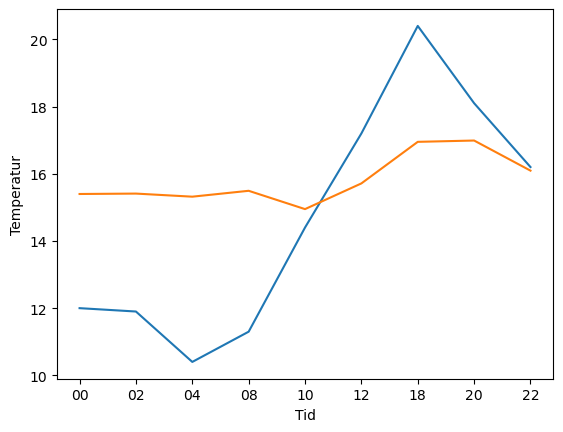

In [139]:
plt.plot(x , y1, y2)
plt.xlabel('Tid')
plt.ylabel('Temperatur')
plt.show()

Oppgave b - Plot air-temperature against water surface temperature (0.5m)

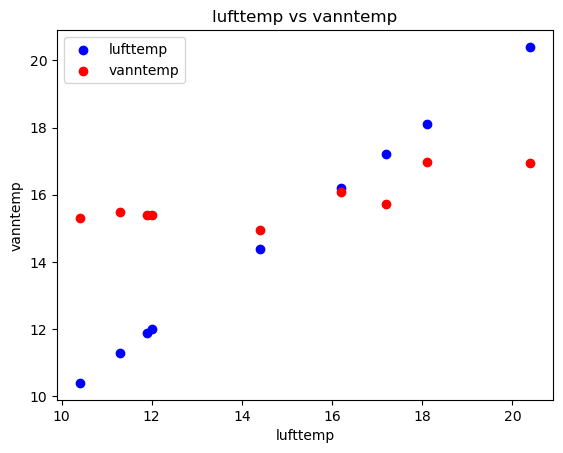

In [140]:
import matplotlib.pyplot as plt

# Plot y1 with blue markers
# Plot y1 and y2 as overlapping points
plt.scatter(y1, y1, color='blue', label='lufttemp')
plt.scatter(y1, y2, color='red', label='vanntemp')

plt.xlabel('lufttemp')
plt.ylabel('vanntemp')
plt.title('lufttemp vs vanntemp')
plt.legend()
plt.show()



Oppgave c - Create and plot a regression line. You can use the formulas from the lectures or a regression
packgage/software.


In [141]:
begge = (y1 + y2) /2
begge

0    13.6990
1    13.6550
2    12.8590
3    13.3965
4    14.6740
5    16.4565
6    18.6750
7    17.5445
8    16.1465
dtype: float64

In [142]:
x = x.astype(int)
x

0     0
1     2
2     4
3     8
4    10
5    12
6    18
7    20
8    22
Name: Tid, dtype: int32

In [143]:
y1

0    12.0
1    11.9
2    10.4
3    11.3
4    14.4
5    17.2
6    20.4
7    18.1
8    16.2
Name: Lufttemperatur, dtype: float64

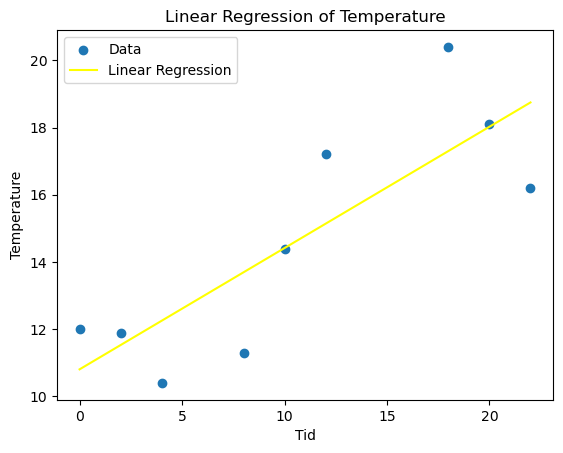

In [144]:
slope1, intercept1, r_value, p_value, std_err = linregress(x, y1)

# Create a scatter plot of the data points
plt.scatter(x, y1, label='Data')

# Calculate the y-values of the linear regression line
regression_line1 = slope1 * x + intercept1

# Plot the linear regression line
plt.plot(x, regression_line1, color='yellow', label='Linear Regression')

plt.xlabel('Tid')
plt.ylabel('Temperature')
plt.title('Linear Regression of Temperature')
plt.legend()
plt.show()

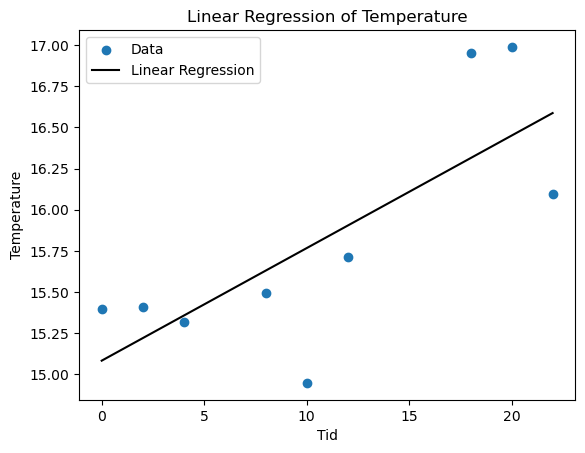

In [145]:
slope2, intercept2, r_value, p_value, std_err = linregress(x, y2)

# Create a scatter plot of the data points
plt.scatter(x, y2, label='Data')

# Calculate the y-values of the linear regression line
regression_line2 = slope2 * x + intercept2

# Plot the linear regression line
plt.plot(x, regression_line2, color='black', label='Linear Regression')

plt.xlabel('Tid')
plt.ylabel('Temperature')
plt.title('Linear Regression of Temperature')
plt.legend()
plt.show()

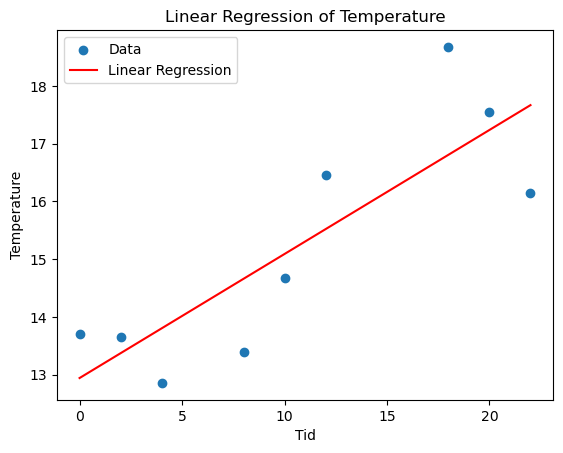

In [146]:
slopebegge, interceptbegge, r_value, p_value, std_err = linregress(x, begge)

# Create a scatter plot of the data points
plt.scatter(x, begge, label='Data')

# Calculate the y-values of the linear regression line
regression_line_begge = slopebegge * x + interceptbegge

# Plot the linear regression line
plt.plot(x, regression_line_begge, color='red', label='Linear Regression')

plt.xlabel('Tid')
plt.ylabel('Temperature')
plt.title('Linear Regression of Temperature')
plt.legend()
plt.show()

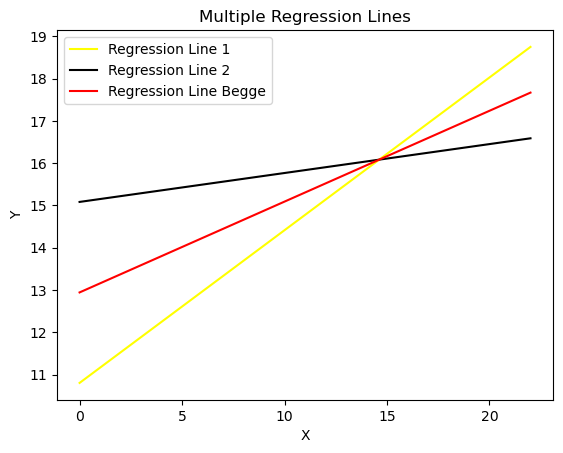

In [147]:
plt.plot(x, regression_line1, color='yellow', label='Regression Line 1')
plt.plot(x, regression_line2, color='black', label='Regression Line 2')
plt.plot(x, regression_line_begge, color='red', label='Regression Line Begge')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Multiple Regression Lines')
plt.legend()
plt.show()

oppgave d - Based on the plot. Is it reasonable to assume that there is a linear relation between air
and water temperature?

Ja, til en vis grad

oppgave e - What is the slope of the regression line? How do you interpret the sign of the slope? (i.e.
in what situations do we have a positive and negative slope?)

In [148]:
print (slope1)
print (slope2)
print (slopebegge)

0.3610677083333332
0.06836588541666666
0.2147167968749999


oppgave f -  Based on your physics knowledge. Is it reasonable to assume that there is a linear relation
between air and water temperature?

Jas, de er nærme hverandre

Se Håkons forklaring